# Pre-processing - penguins Dataset

In [5]:
# Task 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Task 2: Data frame
raw_data = pd.read_csv('penguins.csv')

In [9]:
# Task 2: Data frame
raw_data.head()

species     island  calorie requirement  average sleep duration  \
0  Adelie  Torgersen                 6563                      11   
1  Adelie  Torgersen                 4890                      14   
2  Adelie  Torgersen                 7184                      11   
3  Adelie  Torgersen                 4169                       8   
4  Adelie  Torgersen                 4774                       8   

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0            39.1           18.7              181.0       3750.0    male   
1            39.5           17.4              186.0       3800.0  female   
2            40.3           18.0              195.0       3250.0  female   
3             NaN            NaN                NaN        992.0     NaN   
4            36.7           19.3              193.0       3450.0  female   

     year  
0  2007.0  
1  2007.0  
2  2007.0  
3  2007.0  
4  2007.0

In [11]:
# Task 2: Statistics
raw_data.describe()

calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.700000         190.000000  3550.000000  2007.000000  
50%        17.300000         197.000000  4050.000000  2008.000000  
75%        18.700000         213.000000  4750.000000  2009.000000  
max       127.260000         231.000000  6300.000000  2009.000000

In [13]:
# Task 2: Data Frame info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 333 non-null    object 
 1   island                  334 non-null    object 
 2   calorie requirement     344 non-null    int64  
 3   average sleep duration  344 non-null    int64  
 4   bill_length_mm          337 non-null    float64
 5   bill_depth_mm           333 non-null    float64
 6   flipper_length_mm       336 non-null    float64
 7   body_mass_g             339 non-null    float64
 8   gender                  327 non-null    object 
 9   year                    342 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 27.0+ KB


In [15]:
raw_data

species     island  calorie requirement  average sleep duration  \
0       Adelie  Torgersen                 6563                      11   
1       Adelie  Torgersen                 4890                      14   
2       Adelie  Torgersen                 7184                      11   
3       Adelie  Torgersen                 4169                       8   
4       Adelie  Torgersen                 4774                       8   
..         ...        ...                  ...                     ...   
339  Chinstrap      Dream                 4826                      11   
340  Chinstrap      Dream                 4111                       9   
341  Chinstrap      Dream                 7049                      10   
342  Chinstrap      Dream                 4705                       7   
343  Chinstrap      Dream                 6098                       7   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0              39.1           18.7              181.0       3750.0    male   
1              39.5           17.4              186.0       3800.0  female   
2              40.3           18.0              195.0       3250.0  female   
3               NaN            NaN                NaN        992.0     NaN   
4              36.7           19.3              193.0       3450.0  female   
..              ...            ...                ...          ...     ...   
339            55.8           19.8              207.0       4000.0    male   
340            43.5           18.1              202.0       3400.0  female   
341            49.6           18.2              193.0       3775.0    male   
342            50.8           19.0              210.0       4100.0    male   
343            50.2           18.7              198.0       3775.0  female   

       year  
0    2007.0  
1    2007.0  
2    2007.0  
3    2007.0  
4    2007.0  
..      ...  
339  2009.0  
340  2009.0  
341  2009.0  
342  2009.0  
343  2009.0  

[344 rows x 10 columns]

In [17]:
# Task 3: Handling Missing Values

df = raw_data.copy()

def calculate_median(col):
    sorted_col = sorted([value for value in col if value is not None])
    n = len(sorted_col)
    if n == 0:
        return None
    mid = n // 2
    return (sorted_col[mid] if n % 2 != 0 else (sorted_col[mid - 1] + sorted_col[mid]) / 2)

def calculate_mode(col):
    freq = {}
    for value in col:
        if value is not None:
            freq[value] = freq.get(value, 0) + 1
    return max(freq, key=freq.get) if freq else None

def fill_na(df):
    for col_name, col in df.items():
        if isinstance(col[0], (int, float, np.float64, np.int64)) or col[0] is None:
            median = calculate_median(col)
            fill_value = median
        else:
            fill_value = calculate_mode(col)
        df[col_name] = [fill_value if pd.isna(val) else val for val in col]

    return df

# Fill missing values in the dataset
df_filled = fill_na(df)

data = df_filled
data

species     island  calorie requirement  average sleep duration  \
0       Adelie  Torgersen                 6563                      11   
1       Adelie  Torgersen                 4890                      14   
2       Adelie  Torgersen                 7184                      11   
3       Adelie  Torgersen                 4169                       8   
4       Adelie  Torgersen                 4774                       8   
..         ...        ...                  ...                     ...   
339  Chinstrap      Dream                 4826                      11   
340  Chinstrap      Dream                 4111                       9   
341  Chinstrap      Dream                 7049                      10   
342  Chinstrap      Dream                 4705                       7   
343  Chinstrap      Dream                 6098                       7   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0             39.10           18.7              181.0       3750.0    male   
1             39.50           17.4              186.0       3800.0  female   
2             40.30           18.0              195.0       3250.0  female   
3             46.85           13.2              202.5        992.0    male   
4             36.70           19.3              193.0       3450.0  female   
..              ...            ...                ...          ...     ...   
339           55.80           19.8              207.0       4000.0    male   
340           43.50           18.1              202.0       3400.0  female   
341           49.60           18.2              193.0       3775.0    male   
342           50.80           19.0              210.0       4100.0    male   
343           50.20           18.7              198.0       3775.0  female   

       year  
0    2007.0  
1    2007.0  
2    2007.0  
3    2007.0  
4    2007.0  
..      ...  
339  2009.0  
340  2009.0  
341  2009.0  
342  2009.0  
343  2009.0  

[344 rows x 10 columns]

In [19]:
# Task 4: Handling String formats

def data_case_insensitive(data_case_sensitive):
    for column in data_case_sensitive.select_dtypes(include=['object']).columns:
        data_case_sensitive[column] = data_case_sensitive[column].str.lower()
    return data_case_sensitive

data_1 = data_case_insensitive(data)

In [21]:
# Task 5: Handling Outliers

def detect_outliers_in_column(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    score = Q3 - Q1
    bound_l = Q1 - 1.5*score
    bound_u = Q3 + 1.5*score
    median = column.median()
    column = np.where((column < bound_l) | (column > bound_u), median, column)

    return column

def detect_outliers_dataset(data_with_outliers):
    for column in data_with_outliers.select_dtypes(include=['float64','int64', 'int8']).columns:
        data_with_outliers[column]=detect_outliers_in_column(data_with_outliers[column])
    return data_with_outliers

data_2 = detect_outliers_dataset(data)
data_2

species     island  calorie requirement  average sleep duration  \
0       adelie  torgersen               6563.0                    11.0   
1       adelie  torgersen               4890.0                    14.0   
2       adelie  torgersen               7184.0                    11.0   
3       adelie  torgersen               4169.0                     8.0   
4       adelie  torgersen               4774.0                     8.0   
..         ...        ...                  ...                     ...   
339  chinstrap      dream               4826.0                    11.0   
340  chinstrap      dream               4111.0                     9.0   
341  chinstrap      dream               7049.0                    10.0   
342  chinstrap      dream               4705.0                     7.0   
343  chinstrap      dream               6098.0                     7.0   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0             39.10           18.7              181.0       3750.0    male   
1             39.50           17.4              186.0       3800.0  female   
2             40.30           18.0              195.0       3250.0  female   
3             46.85           13.2              202.5       4050.0    male   
4             36.70           19.3              193.0       3450.0  female   
..              ...            ...                ...          ...     ...   
339           55.80           19.8              207.0       4000.0    male   
340           43.50           18.1              202.0       3400.0  female   
341           49.60           18.2              193.0       3775.0    male   
342           50.80           19.0              210.0       4100.0    male   
343           50.20           18.7              198.0       3775.0  female   

       year  
0    2007.0  
1    2007.0  
2    2007.0  
3    2007.0  
4    2007.0  
..      ...  
339  2009.0  
340  2009.0  
341  2009.0  
342  2009.0  
343  2009.0  

[344 rows x 10 columns]

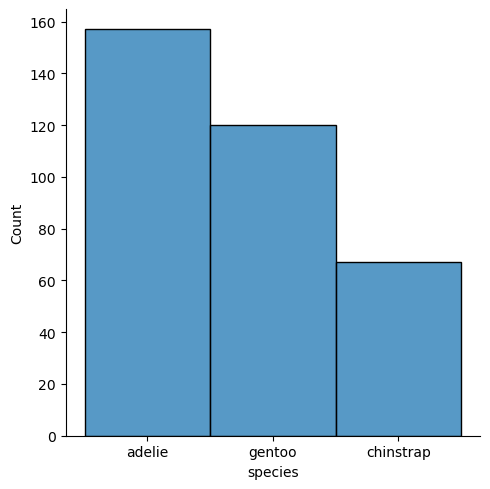

In [23]:
# Task 6: Data visualization

sns.displot(data=data_1, x="species")

[Text(0.5, 1.0, 'Detecting Outliers')]

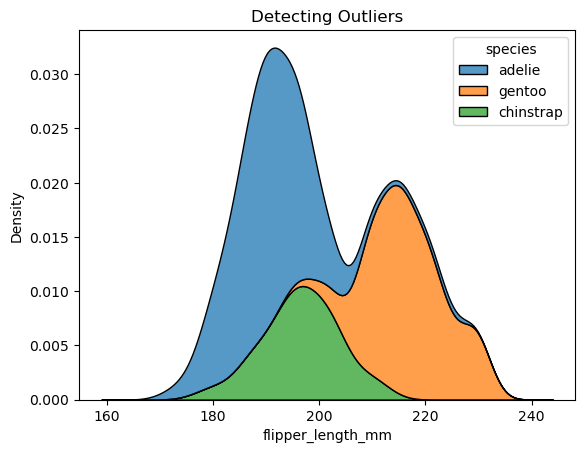

In [25]:
# Task 6: Data visualization

sns.kdeplot(data=data_1, x="flipper_length_mm", hue="species", multiple="stack").set(title='Detecting Outliers')

[Text(0.5, 1.0, 'Outlier free data')]

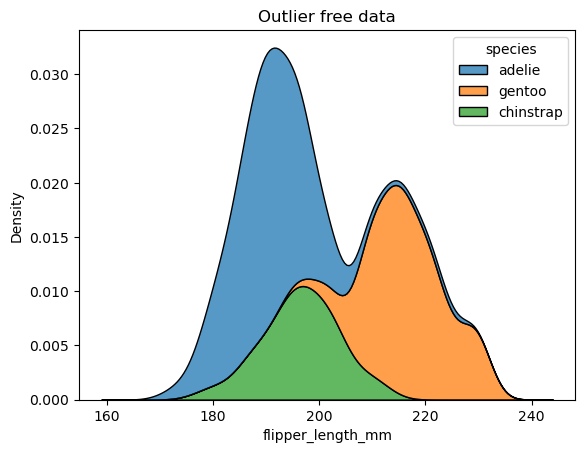

In [27]:
# Task 6: Data visualization

sns.kdeplot(data=data_2, x="flipper_length_mm", hue="species", multiple="stack").set(title='Outlier free data')

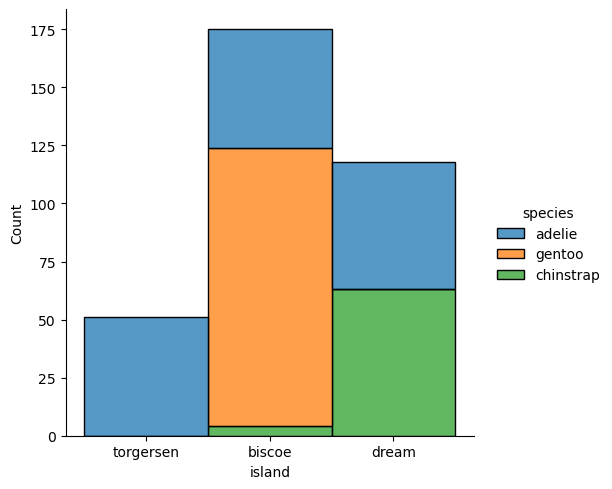

In [29]:
# Task 6: Data visualization

sns.displot(data=data_1, x="island", hue="species", multiple="stack")

In [31]:
# Task 8: Transform string to Categorical

data_2['species'] = pd.Categorical(data_2['species']).codes
data_2['island'] = pd.Categorical(data_2['island']).codes
data_2['gender'] = pd.Categorical(data_2['gender']).codes

data_2

species  island  calorie requirement  average sleep duration  \
0          0       2               6563.0                    11.0   
1          0       2               4890.0                    14.0   
2          0       2               7184.0                    11.0   
3          0       2               4169.0                     8.0   
4          0       2               4774.0                     8.0   
..       ...     ...                  ...                     ...   
339        1       1               4826.0                    11.0   
340        1       1               4111.0                     9.0   
341        1       1               7049.0                    10.0   
342        1       1               4705.0                     7.0   
343        1       1               6098.0                     7.0   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0             39.10           18.7              181.0       3750.0       1   
1             39.50           17.4              186.0       3800.0       0   
2             40.30           18.0              195.0       3250.0       0   
3             46.85           13.2              202.5       4050.0       1   
4             36.70           19.3              193.0       3450.0       0   
..              ...            ...                ...          ...     ...   
339           55.80           19.8              207.0       4000.0       1   
340           43.50           18.1              202.0       3400.0       0   
341           49.60           18.2              193.0       3775.0       1   
342           50.80           19.0              210.0       4100.0       1   
343           50.20           18.7              198.0       3775.0       0   

       year  
0    2007.0  
1    2007.0  
2    2007.0  
3    2007.0  
4    2007.0  
..      ...  
339  2009.0  
340  2009.0  
341  2009.0  
342  2009.0  
343  2009.0  

[344 rows x 10 columns]

In [33]:
# Task 7: Plot function definition Identifying Correlation

def Plot_Correlation(data_set, name):
    matrix = data_set.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix Heatmap: {name}')
    plt.show()
    return matrix

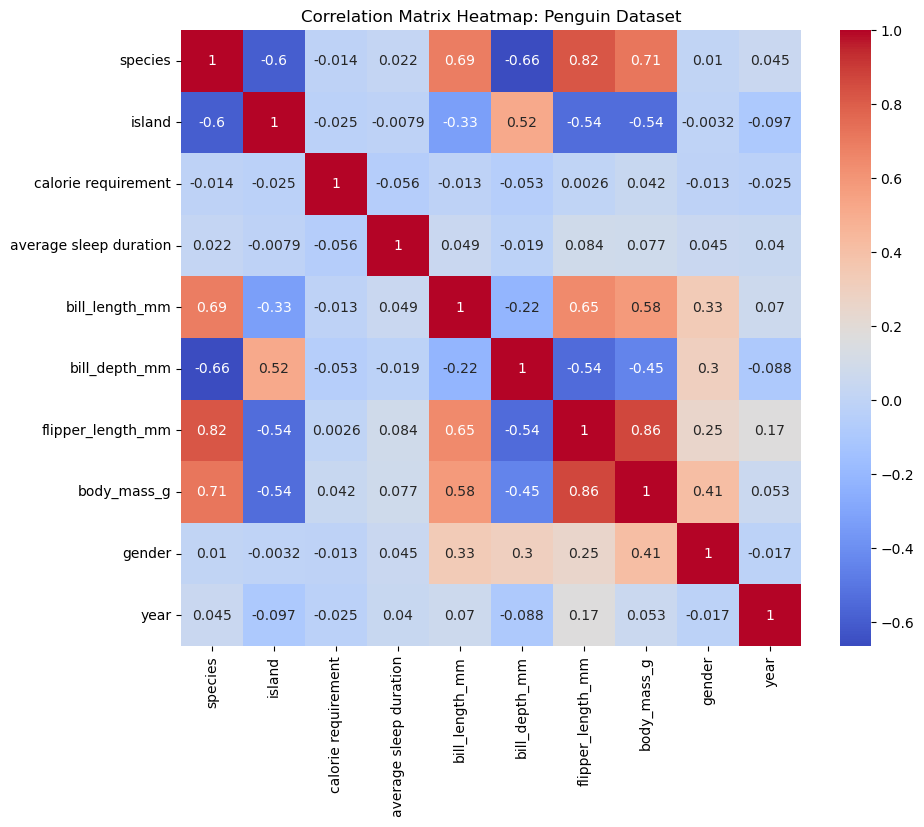

In [35]:
# Task 7: Correlation Plot

corr_matrix_penguin = Plot_Correlation(data_2, 'Penguin Dataset')

In [37]:
# Task 7: Identifying Correlated/Uncorrelated function definition
def uncorrelated_cols(matrix, col, filter):
    uncorrelated = []
    cols = matrix[col].sort_values(ascending=False)
    for i in range(len(cols)):
        if abs(cols[i]) < filter:
            uncorrelated.append(cols.keys()[i])
    return uncorrelated

In [39]:
# Task 7: Identifying Uncorrelated
uncorrelated_cols(corr_matrix_penguin, 'gender', 0.1)

/tmp/ipykernel_40231/1827711445.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(cols[i]) < filter:


['average sleep duration', 'species', 'island', 'calorie requirement', 'year']

In [41]:
# Task 9: Normalize Columns

def Normalize_column(column):
    min = column.min()
    max = column.max()
    return (column - min) / (max - min)

def Normalize_dataset(data_set):
    for column in data_set.columns:
        data_set[column] = Normalize_column(data_set[column])
    return data_set

print("Normalized DataFrame:")
data_3 = Normalize_dataset(data_2)
data_3

Normalized DataFrame:


species  island  calorie requirement  average sleep duration  \
0        0.0     1.0             0.828324                0.571429   
1        0.0     1.0             0.375305                1.000000   
2        0.0     1.0             0.996480                0.571429   
3        0.0     1.0             0.180070                0.142857   
4        0.0     1.0             0.343894                0.142857   
..       ...     ...                  ...                     ...   
339      0.5     0.5             0.357975                0.571429   
340      0.5     0.5             0.164365                0.285714   
341      0.5     0.5             0.959924                0.428571   
342      0.5     0.5             0.325210                0.000000   
343      0.5     0.5             0.702410                0.000000   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0          0.254545       0.666667           0.152542     0.291667     1.0   
1          0.269091       0.511905           0.237288     0.305556     0.0   
2          0.298182       0.583333           0.389831     0.152778     0.0   
3          0.536364       0.011905           0.516949     0.375000     1.0   
4          0.167273       0.738095           0.355932     0.208333     0.0   
..              ...            ...                ...          ...     ...   
339        0.861818       0.797619           0.593220     0.361111     1.0   
340        0.414545       0.595238           0.508475     0.194444     0.0   
341        0.636364       0.607143           0.355932     0.298611     1.0   
342        0.680000       0.702381           0.644068     0.388889     1.0   
343        0.658182       0.666667           0.440678     0.298611     0.0   

     year  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
..    ...  
339   1.0  
340   1.0  
341   1.0  
342   1.0  
343   1.0  

[344 rows x 10 columns]

In [43]:
# Save Dataset to CSV

data_3.to_csv('penguins_preprocessed.csv', index=False)

# Pre-processing -  Wine Dataset

In [46]:
# Task 2: Data frame
raw_data_redwine = pd.read_csv('winequality-red.csv', sep=";")
raw_data_whitewine = pd.read_csv('winequality-white.csv', sep=";")

In [48]:
# Task 2: Data frame
raw_data_redwine['type'] = 'red'
raw_data_whitewine['type'] = 'white'

In [50]:
# Task 2: Data frame Union
raw_data_wine = pd.concat([raw_data_whitewine, raw_data_redwine], ignore_index=True)

In [52]:
# Task 2: Dataset Stastics 
raw_data_wine.info()
raw_data_wine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

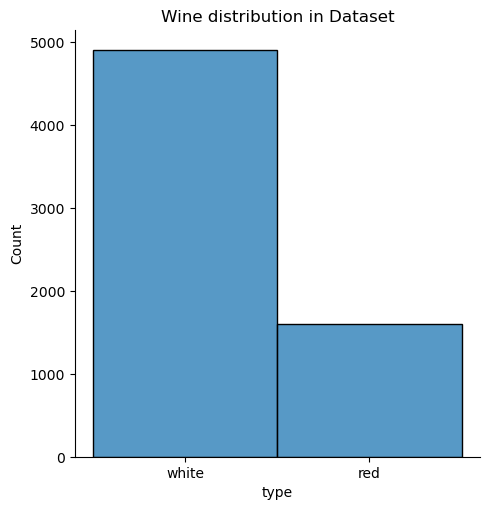

In [54]:
# Task 6: Data visualization

sns.displot(data=raw_data_wine, x="type").set(title='Wine distribution in Dataset')

In [56]:
# Task 2: Dataset Stastics 
raw_data_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

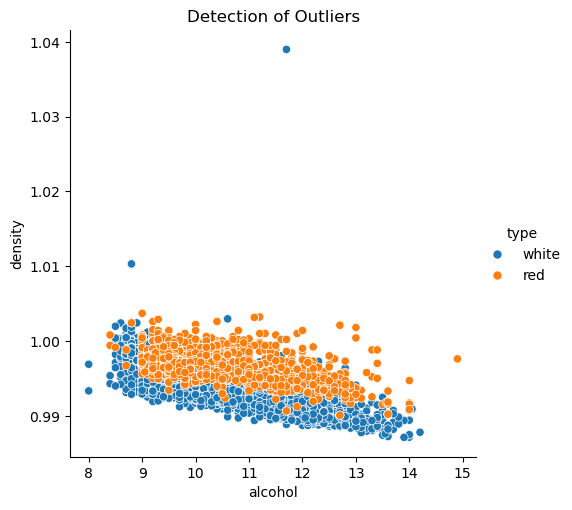

In [58]:
# Task 6: Data visualization

sns.relplot(data=raw_data_wine, y="density", x='alcohol', hue='type').set(title='Detection of Outliers')

[Text(0.5, 1.0, 'Detection of Outliers')]

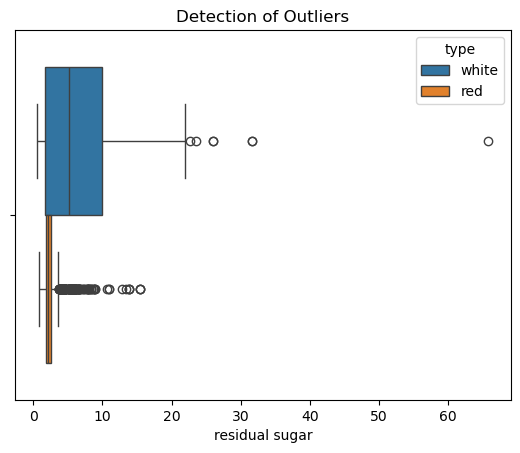

In [59]:
# Task 6: Data visualization

sns.boxplot(data=raw_data_wine, x='residual sugar', hue='type').set(title='Detection of Outliers')

### Plotting every possible plot to get any correllations

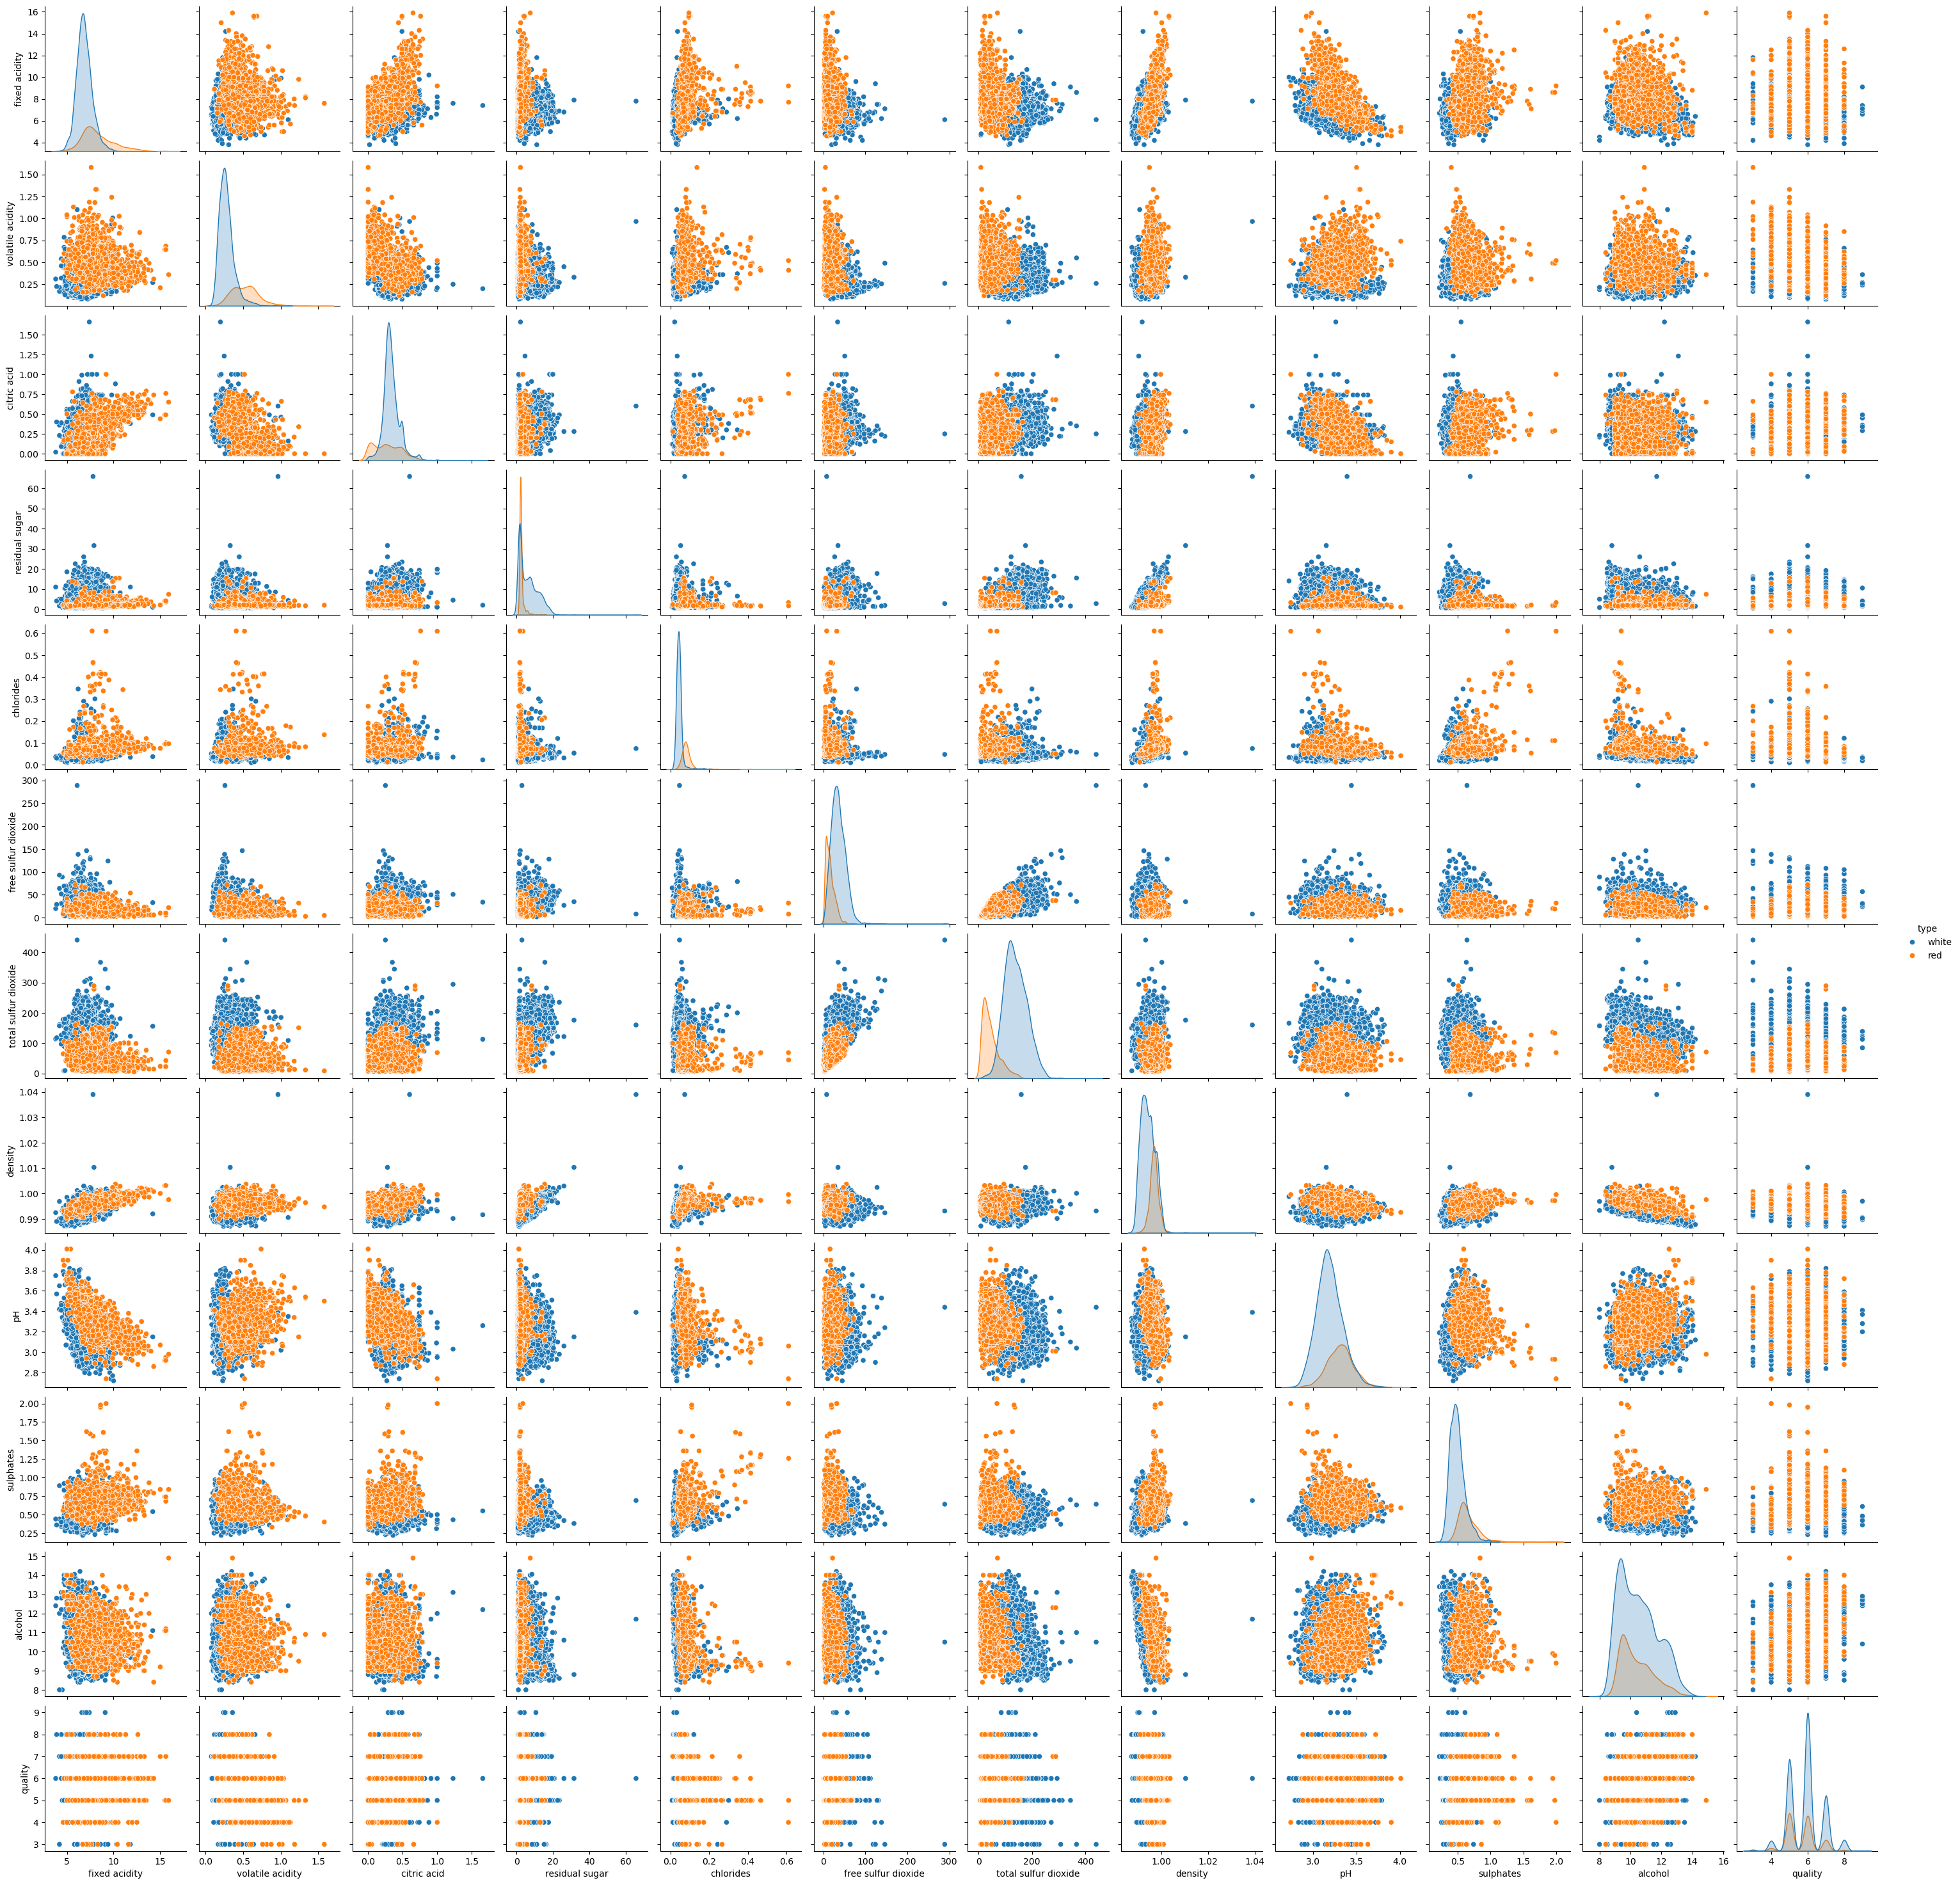

In [63]:
sns.pairplot(data=raw_data_wine, hue="type")

[Text(0.5, 1.0, 'Detecting Outliers')]

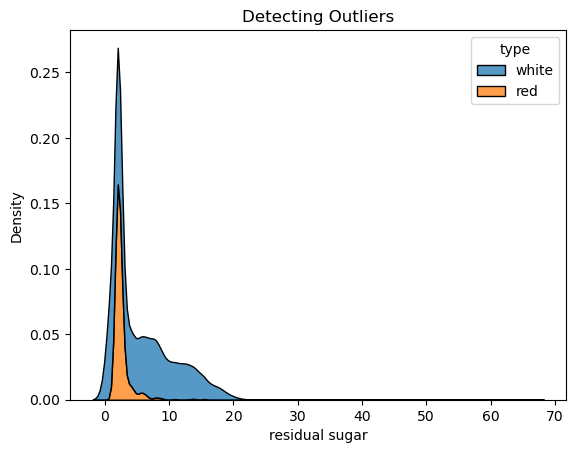

In [64]:
# Task 6: Data visualization

sns.kdeplot(data=raw_data_wine, x="residual sugar", hue="type", multiple="stack").set(title="Detecting Outliers")

[Text(0.5, 1.0, 'Detecting Outliers')]

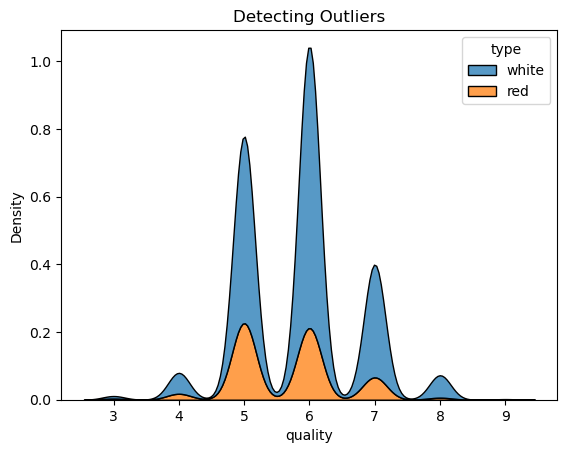

In [65]:
# Task 6: Data visualization

sns.kdeplot(data=raw_data_wine, x="quality", hue="type", multiple="stack").set(title="Detecting Outliers")

In [66]:
# Task 5: Handling Outliers

wine_data_olfree = detect_outliers_dataset(raw_data_wine)
wine_data_olfree

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36             3.0      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality   type  
0         8.8      6.0  white  
1         9.5      6.0  white  
2        10.1      6.0  white  
3         9.9      6.0  white  
4         9.9      6.0  white  
...       ...      ...    ...  
6492     10.5      5.0    red  
6493     11.2      6.0    red  
6494     11.0      6.0    red  
6495     10.2      5.0    red  
6496     11.0      6.0    red  

[6497 rows x 13 columns]

[Text(0.5, 1.0, 'Outlier Free')]

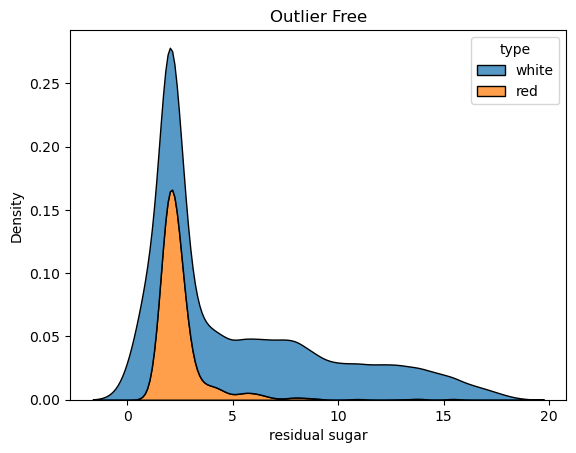

In [67]:
# Task 6: Data visualization

sns.kdeplot(data=wine_data_olfree, x="residual sugar", hue="type", multiple="stack").set(title="Outlier Free")

[Text(0.5, 1.0, 'Outlier Free')]

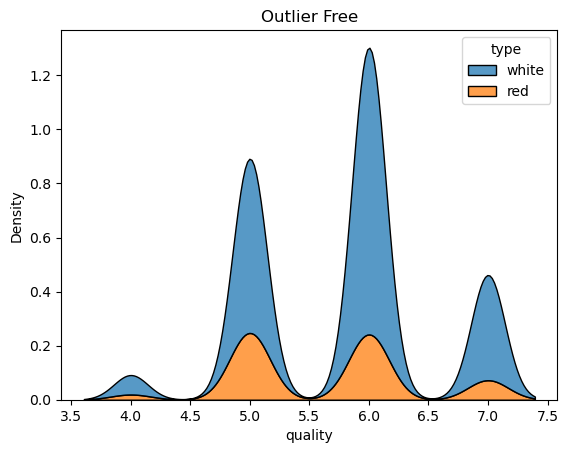

In [68]:
# Task 6: Data visualization

sns.kdeplot(data=wine_data_olfree, x="quality", hue="type", multiple="stack").set(title="Outlier Free")

In [69]:
# Task 8: One hot 

wine_data_encoded = pd.get_dummies(raw_data_wine, columns=['type'], drop_first=True)
wine_data_encoded.rename(columns={'type_white': 'type'}, inplace=True)
wine_data_encoded['type'] = wine_data_encoded['type'].astype(int)
wine_data_encoded

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36             3.0      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  type  
0         8.8      6.0     1  
1         9.5      6.0     1  
2        10.1      6.0     1  
3         9.9      6.0     1  
4         9.9      6.0     1  
...       ...      ...   ...  
6492     10.5      5.0     0  
6493     11.2      6.0     0  
6494     11.0      6.0     0  
6495     10.2      5.0     0  
6496     11.0      6.0     0  

[6497 rows x 13 columns]

**White wine** is marked as 1;
**Red wine** is marked as 0

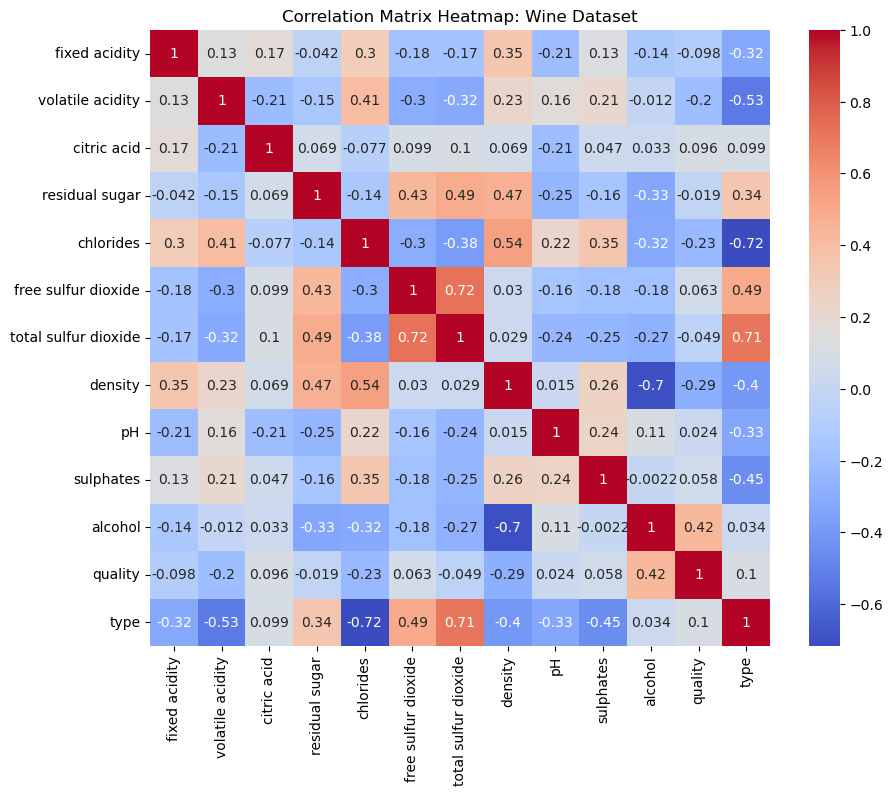

In [71]:
# Task 7: Identifying Correlation

corr_matrix = Plot_Correlation(wine_data_encoded, "Wine Dataset")

In [72]:
# Task 7: Identifying Correlation
print(corr_matrix['type'].sort_values(ascending=False))

type                    1.000000
total sulfur dioxide    0.706939
free sulfur dioxide     0.491837
residual sugar          0.344695
quality                 0.104120
citric acid             0.098863
alcohol                 0.033528
fixed acidity          -0.317101
pH                     -0.327431
density                -0.401345
sulphates              -0.448148
volatile acidity       -0.532417
chlorides              -0.716221
Name: type, dtype: float64


In [73]:
# Task 7: Identifying Uncorrelated rows
uncorrelated_cols(corr_matrix, 'type', 0.1)

/tmp/ipykernel_40231/1827711445.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(cols[i]) < filter:


['citric acid', 'alcohol']

In [74]:
# Task 9: Normalization
wine_data_normalized = Normalize_dataset(wine_data_encoded)
wine_data_normalized

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.490196          0.330435     0.571429        0.142012   0.375000   
1          0.352941          0.382609     0.535714        0.059172   0.416667   
2          0.705882          0.347826     0.642857        0.372781   0.427083   
3          0.529412          0.260870     0.500000        0.467456   0.510417   
4          0.529412          0.260870     0.500000        0.467456   0.510417   
...             ...               ...          ...             ...        ...   
6492       0.333333          0.904348     0.071429        0.082840   0.843750   
6493       0.274510          0.817391     0.107143        0.094675   0.552083   
6494       0.352941          0.747826     0.160714        0.100592   0.697917   
6495       0.274510          0.982609     0.142857        0.082840   0.687500   
6496       0.294118          0.400000     0.767857        0.177515   0.604167   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.578947              0.616541  0.837756  0.240964   
1                0.171053              0.473684  0.415561  0.602410   
2                0.381579              0.342105  0.481906  0.554217   
3                0.605263              0.676692  0.512063  0.469880   
4                0.605263              0.676692  0.512063  0.469880   
...                   ...                   ...       ...       ...   
6492             0.407895              0.142857  0.469843  0.783133   
6493             0.500000              0.169173  0.483112  0.867470   
6494             0.368421              0.127820  0.520507  0.746988   
6495             0.407895              0.142857  0.504222  0.927711   
6496             0.223684              0.135338  0.505428  0.710843   

      sulphates   alcohol   quality  type  
0      0.365079  0.133333  0.666667   1.0  
1      0.428571  0.250000  0.666667   1.0  
2      0.349206  0.350000  0.666667   1.0  
3      0.285714  0.316667  0.666667   1.0  
4      0.285714  0.316667  0.666667   1.0  
...         ...       ...       ...   ...  
6492   0.571429  0.416667  0.333333   0.0  
6493   0.857143  0.533333  0.666667   0.0  
6494   0.841270  0.500000  0.666667   0.0  
6495   0.777778  0.366667  0.333333   0.0  
6496   0.698413  0.500000  0.666667   0.0  

[6497 rows x 13 columns]

In [75]:
# Save Dataset to CSV

wine_data_normalized.to_csv('winequality_preprocessed.csv', index=False)

# Pre-processing - Diamond Dataset

In [5]:
# Task 2: Data frame
data_frame_diamond=pd.read_csv("diamond.csv")
print(data_frame_diamond)

      Unnamed: 0 carat        cut color clarity  average us salary  \
0              1  0.23      Ideal     E     SI2              31282   
1              2  0.21    Premium     E     SI1              40049   
2              3  0.23       Good     E     VS1              33517   
3              4  0.29    Premium     I     VS2              38495   
4              5  0.31       Good     J     SI2              34178   
...          ...   ...        ...   ...     ...                ...   
53935      53936  0.72      Ideal     D     SI1              43892   
53936      53937  0.72       Good     D     SI1              35532   
53937      53938   0.7  Very Good     D     SI1              32133   
53938      53939  0.86    Premium     H     SI2              44248   
53939      53940  0.75      Ideal     D     SI2              41412   

       number of diamonds mined (millions) depth table price     x     y     z  
0                                     5.01  61.5    55   326  3.95  3.98  2.43

In [7]:
# Task 2: Data frame
#By using head attribute we can display the first nth rows 
data_frame_diamond.head(10)

Unnamed: 0  carat        cut color clarity  average us salary  \
0          1   0.23      Ideal     E     SI2              31282   
1          2   0.21    Premium     E     SI1              40049   
2          3   0.23       Good     E     VS1              33517   
3          4   0.29    Premium     I     VS2              38495   
4          5   0.31       Good     J     SI2              34178   
5          6   0.24  Very Good     J    VVS2              44700   
6          7   0.24  Very Good     I    VVS1              42939   
7          8  FALSE        NaN     H     SI1              37587   
8          9   0.22       Fair     E     VS2              30454   
9         10   0.23  Very Good     H     VS1              45506   

   number of diamonds mined (millions)  depth  table price     x     y     z  
0                                 5.01   61.5     55   326  3.95  3.98  2.43  
1                                 1.69   59.8     61   326  3.89  3.84  2.31  
2                                 3.85   56.9     65   327  4.05  4.07  2.31  
3                                 3.49   62.4     58   334   4.2  4.23  2.63  
4                                 4.70   63.3     58   335  4.34  4.35  2.75  
5                                 0.86   62.8     57   336  3.94  3.96  2.48  
6                                 1.68   62.3     57   336  3.95  3.98  2.47  
7                                 4.62  MAYBE  MAYBE   NaN  4.07  4.11  2.53  
8                                 4.02   65.1     61   337  3.87  3.78  2.49  
9                                 1.20   59.4     61   338     4  4.05  2.39

In [9]:
# Task 2: Data frame
#we need to know the data in formation and data types of the data we are working on so we use .info
data_frame_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           53563 non-null  object 
 1   carat                                52430 non-null  object 
 2   cut                                  52647 non-null  object 
 3   color                                52428 non-null  object 
 4   clarity                              53587 non-null  object 
 5   average us salary                    53940 non-null  int64  
 6   number of diamonds mined (millions)  53940 non-null  float64
 7   depth                                53246 non-null  object 
 8   table                                52398 non-null  object 
 9   price                                52357 non-null  object 
 10  x                                    52414 non-null  object 
 11  y                           

In [11]:
#as the column "Unnamed: 0" is just the index of the data and wouldnt be useful in the future process we drop the column 
data_frame_diamond=data_frame_diamond.drop('Unnamed: 0', axis=1)
data_frame_diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'average us salary',
       'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x',
       'y', 'z'],
      dtype='object')

In [13]:
# Task 2: Data frame
data_frame_diamond.describe()

average us salary  number of diamonds mined (millions)
count       53940.000000                         53940.000000
mean        39521.990100                             2.902669
std          5486.892971                             1.325985
min         30000.000000                             0.600000
25%         34780.000000                             1.750000
50%         39547.500000                             2.910000
75%         44252.000000                             4.050000
max         48999.000000                             5.200000

In [15]:
#prints the number of null values in each column of the data frame 
data_frame_diamond.isnull().sum()

carat                                  1510
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                   694
table                                  1542
price                                  1583
x                                      1526
y                                      1221
z                                      1433
dtype: int64

In [17]:
#there are invald enteries in the data set so we need to remove these invalid entries
invalid_entries = ['TRUE', 'FALSE', 'MAYBE']

#replacing all the invalid entries with null values  
data_frame_diamond = data_frame_diamond.replace(invalid_entries, pd.NA)

#select all the numeric columns from the data frame and replace all the null values in the column with mean value of the respective column  
num_columns = data_frame_diamond.select_dtypes(include=['float64', 'int64']).columns
data_frame_diamond.fillna({col: data_frame_diamond[col].mean() for col in num_columns}, inplace=True)

#select all the non numeric columns from the data frame and replace all the null values in the column with most repeated value of the respective column that is mode of the coloumn 
non_num_columns= data_frame_diamond.select_dtypes(include=['object']).columns
data_frame_diamond.fillna({col: data_frame_diamond[col].mode()[0] for col in non_num_columns}, inplace=True)

data_frame_diamond_1 = data_frame_diamond.copy()

In [19]:
#we check the null value count after replacing all the null values with mean and mode 
data_frame_diamond_1.isnull().sum()

carat                                  0
cut                                    0
color                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64

In [21]:
# Task 4: Handling String formats
#we convert all the non numeric coloums to lower case 
data_frame_diamond_1['cut'] = data_frame_diamond_1['cut'].str.lower()
data_frame_diamond_1['color'] = data_frame_diamond_1['color'].str.lower()
data_frame_diamond_1['clarity'] = data_frame_diamond_1['clarity'].str.lower()

In [23]:
data_frame_diamond_1.head()

carat      cut color clarity  average us salary  \
0  0.23    ideal     e     si2              31282   
1  0.21  premium     e     si1              40049   
2  0.23     good     e     vs1              33517   
3  0.29  premium     i     vs2              38495   
4  0.31     good     j     si2              34178   

   number of diamonds mined (millions) depth table price     x     y     z  
0                                 5.01  61.5    55   326  3.95  3.98  2.43  
1                                 1.69  59.8    61   326  3.89  3.84  2.31  
2                                 3.85  56.9    65   327  4.05  4.07  2.31  
3                                 3.49  62.4    58   334   4.2  4.23  2.63  
4                                 4.70  63.3    58   335  4.34  4.35  2.75

In [25]:
# Task 5: Handling Outliers
#selecting the numeric columns from the data frame 
numerical_columns = data_frame_diamond_1.select_dtypes(include=['float64', 'int64']).columns

#function to replace all the  numeric data with mean values 
def outliers(data_frame_diamond_1, column):
    Q1 = data_frame_diamond_1[column].quantile(0.25)
    Q3 = data_frame_diamond_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = data_frame_diamond_1[column].mean()
    data_frame_diamond_1[column] = data_frame_diamond_1[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    return data_frame_diamond_1


for column in numerical_columns:
    data_frame_diamond_1 = outliers(data_frame_diamond_1, column)

data_frame_diamond_1.head()


carat      cut color clarity  average us salary  \
0  0.23    ideal     e     si2              31282   
1  0.21  premium     e     si1              40049   
2  0.23     good     e     vs1              33517   
3  0.29  premium     i     vs2              38495   
4  0.31     good     j     si2              34178   

   number of diamonds mined (millions) depth table price     x     y     z  
0                                 5.01  61.5    55   326  3.95  3.98  2.43  
1                                 1.69  59.8    61   326  3.89  3.84  2.31  
2                                 3.85  56.9    65   327  4.05  4.07  2.31  
3                                 3.49  62.4    58   334   4.2  4.23  2.63  
4                                 4.70  63.3    58   335  4.34  4.35  2.75

In [27]:
#convert "carat","price " columns to numeric
data_frame_diamond_1['carat'] = pd.to_numeric(data_frame_diamond_1['carat'], errors='coerce')
data_frame_diamond_1['price'] = pd.to_numeric(data_frame_diamond_1['price'], errors='coerce')

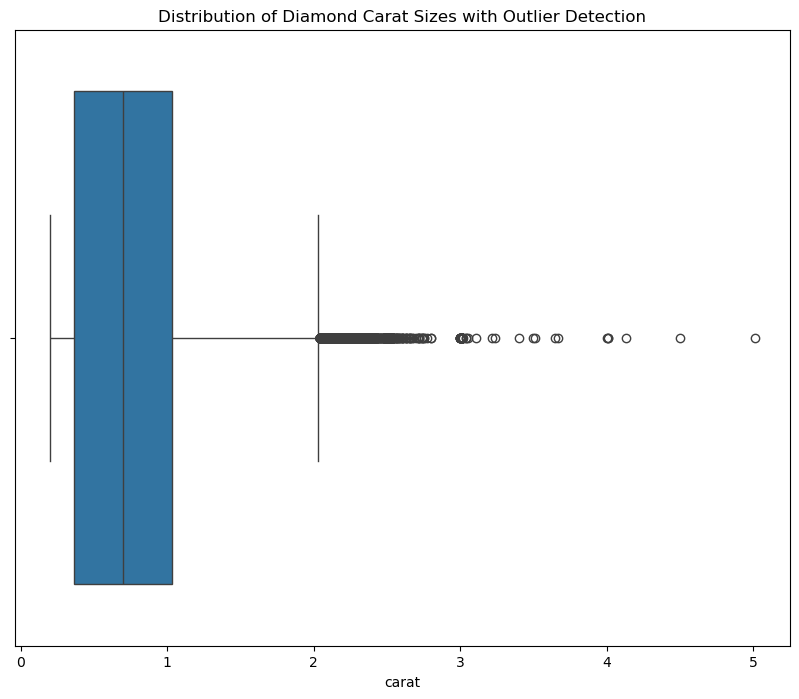

In [29]:
# Task 6: Data visualization
plt.figure(figsize=(10,8))
sns.boxplot(x='carat', data=data_frame_diamond_1)
plt.title('Distribution of Diamond Carat Sizes with Outlier Detection')
plt.show()

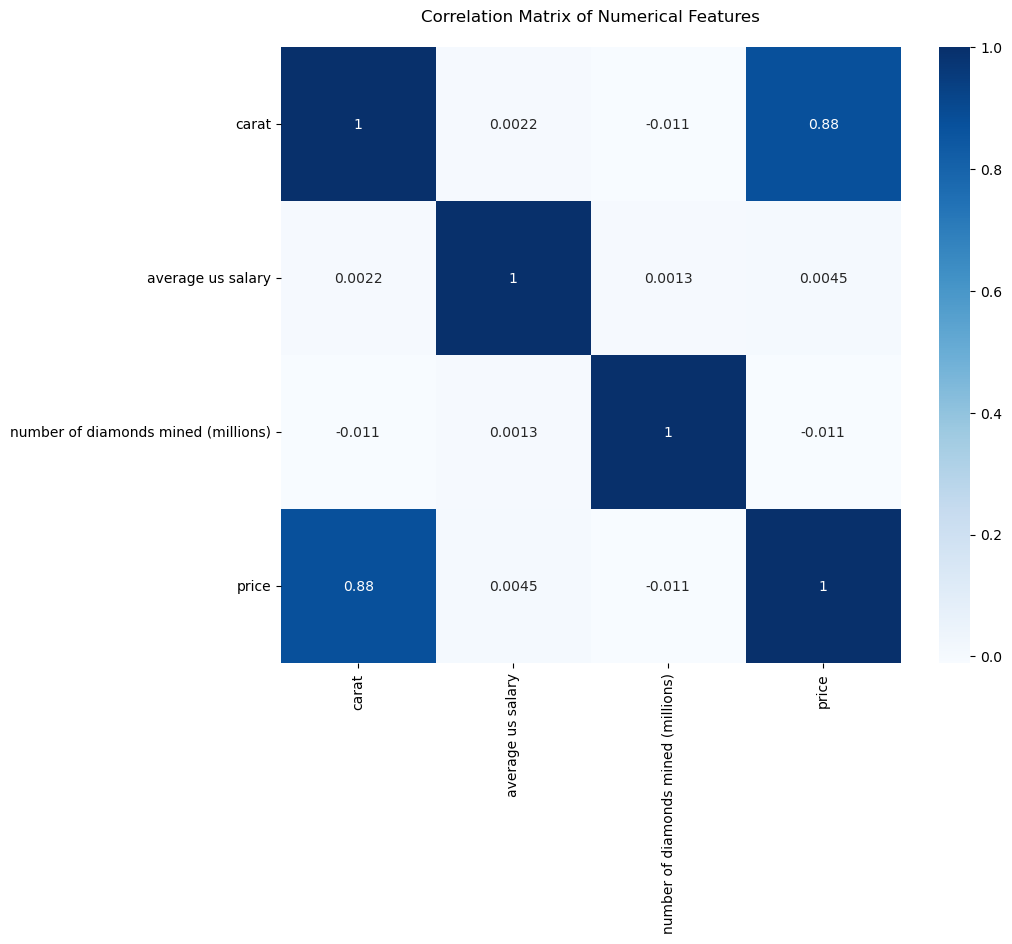

In [31]:
# Task 6: Data visualization
plt.figure(figsize=(10, 8))

numeric_columns = data_frame_diamond_1.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Numerical Features\n')
plt.show()

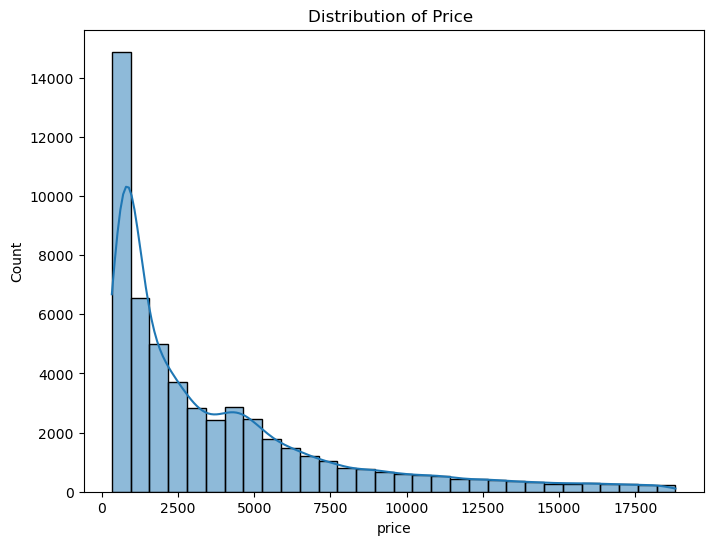

In [33]:
# Task 6: Data visualization
plt.figure(figsize=(8, 6))
sns.histplot(data_frame_diamond_1['price'], bins=30, kde=True)
plt.title('Distribution of Price ')
plt.show()

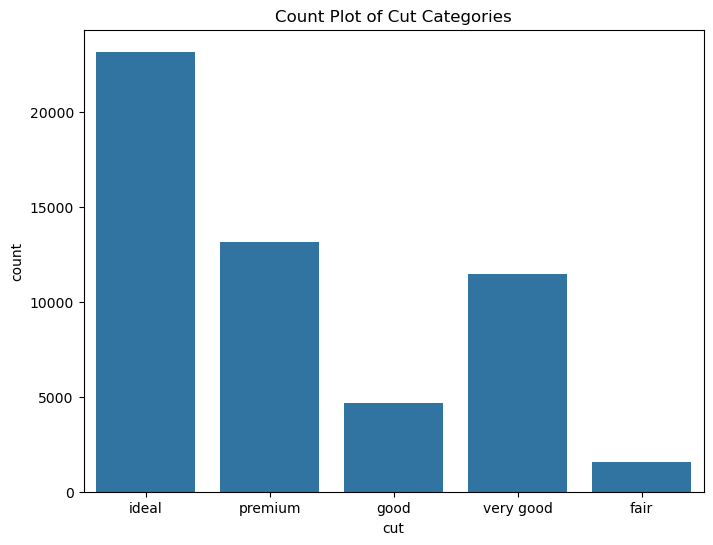

In [35]:
# Task 6: Data visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='cut', data=data_frame_diamond_1)
plt.title('Count Plot of Cut Categories')
plt.show()

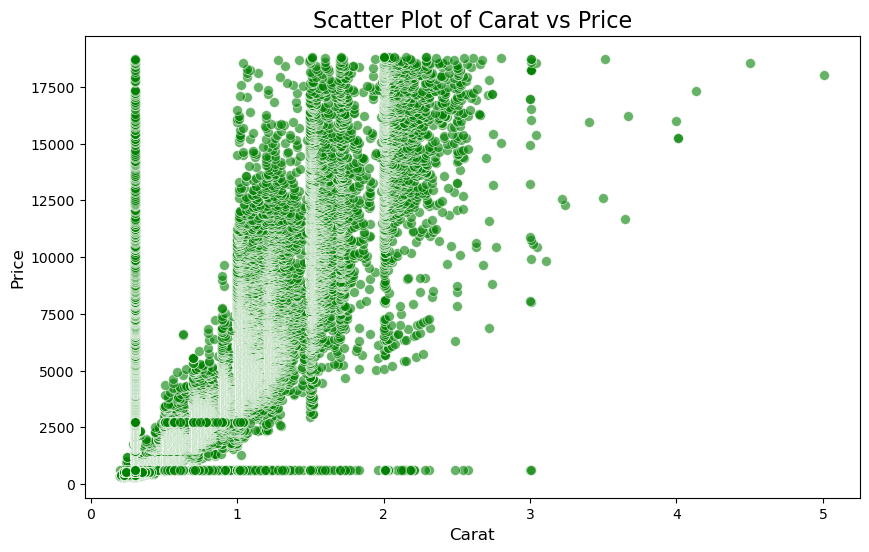

In [37]:
# Task 6: Data visualization
plt.figure(figsize=(10, 6))

sns.scatterplot(data=data_frame_diamond_1, x='carat', y='price', alpha=0.6, s=50, color='green')

plt.title("Scatter Plot of Carat vs Price", fontsize=16)
plt.xlabel("Carat", fontsize=12)
plt.ylabel("Price", fontsize=12)

plt.show()

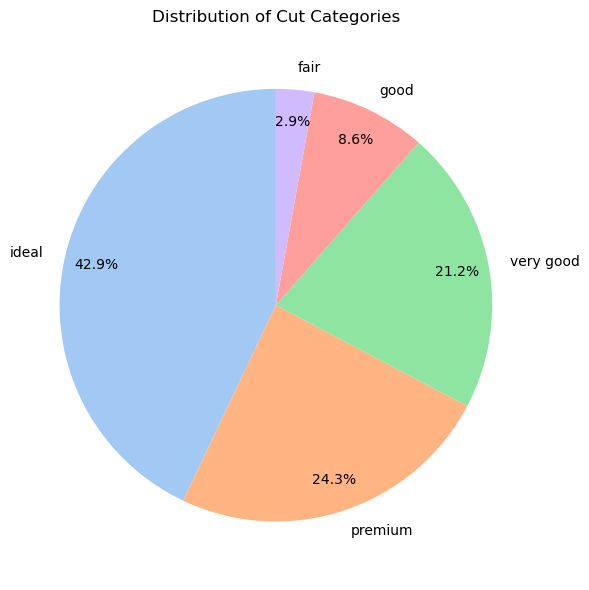

In [39]:
# Task 6: Data visualization
cut_counts = data_frame_diamond_1['cut'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(cut_counts, labels=cut_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('pastel'), pctdistance=0.85)
plt.title('Distribution of Cut Categories')
plt.axis('equal')
plt.tight_layout()
plt.show()


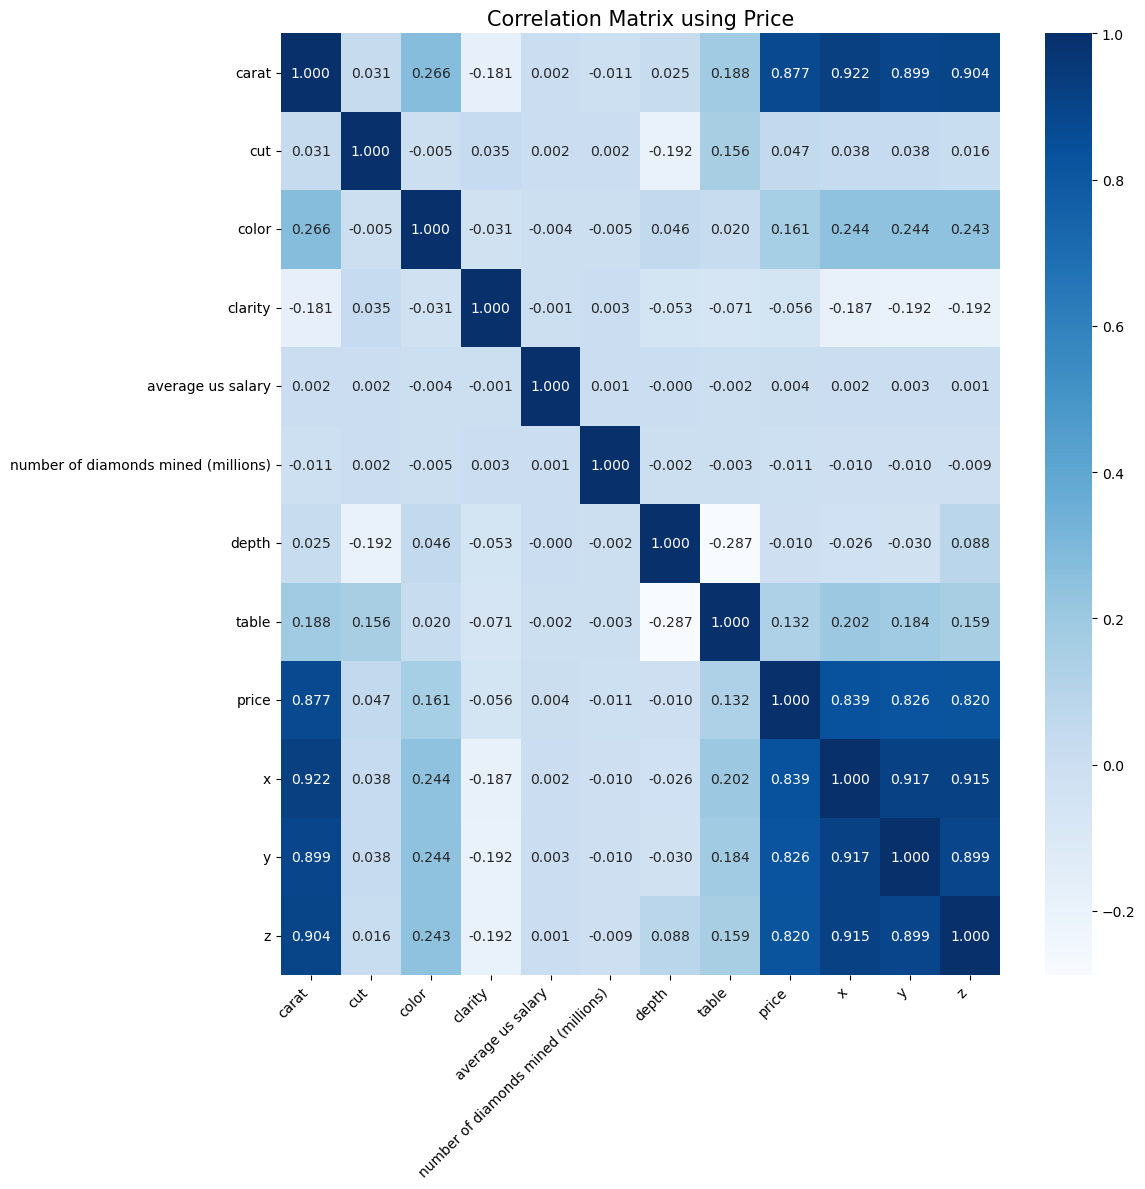

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Convert categorical columns to numerical codes
data_frame_diamond_1['cut'] = data_frame_diamond_1['cut'].astype('category').cat.codes
data_frame_diamond_1['color'] = data_frame_diamond_1['color'].astype('category').cat.codes
data_frame_diamond_1['clarity'] = data_frame_diamond_1['clarity'].astype('category').cat.codes

# Adjust figure size for better readability
plt.figure(figsize=(12, 12))

# Create the heatmap with correlation matrix, including formatting for annotations
sns.heatmap(data_frame_diamond_1.corr(), cmap='Blues', annot=True, fmt=".3f")

# Set the title size and alignment of x-tick labels for better visibility
plt.title("Correlation Matrix using Price", size=15)
plt.xticks(rotation=45, ha='right')

# Adjust the layout
plt.tight_layout()

# Display the heatmap
plt.show()

In [43]:
# Task 7: Plot function definition Identifying Correlation
for col in data_frame_diamond_1.select_dtypes(include=['object']).columns:
    data_frame_diamond_1[col] = pd.Categorical(data_frame_diamond_1[col]).codes
matrix = data_frame_diamond_1.corr()
correlation = matrix['cut'].sort_values(ascending=False)
print("Correlation value of feature vs cut:\n", correlation)
threshold = 0.02
low = correlation[correlation.abs() < threshold].index
data_frame_diamond_1 = data_frame_diamond_1.drop(columns=low)
print(f"\n low correlation columns:{list(low)}")

Correlation value of feature vs cut:
 cut                                    1.000000
table                                  0.180074
price                                  0.047320
y                                      0.038818
x                                      0.038676
clarity                                0.035349
carat                                  0.031366
z                                      0.015287
average us salary                      0.001916
number of diamonds mined (millions)    0.001913
color                                 -0.005366
depth                                 -0.194196
Name: cut, dtype: float64

 low correlation columns:['z', 'average us salary', 'number of diamonds mined (millions)', 'color']


In [45]:
# Task 8: Transform string to Categorical
data_frame_diamond_1['cut'] = pd.Categorical(data_frame_diamond_1['cut']).codes
data_frame_diamond_1['clarity'] = pd.Categorical(data_frame_diamond_1['clarity']).codes
data_frame_diamond_1

carat  cut  clarity  depth  table  price    x    y
0       0.23    2        3     83     29    326   26   28
1       0.21    3        2     66     89    326   20   14
2       0.23    1        4     37    113    327   36   38
3       0.29    3        5     92     59    334   51   54
4       0.31    1        3    101     59    335   65   66
...      ...  ...      ...    ...    ...    ...  ...  ...
53935   0.72    2        2     76     49   2757  206  207
53936   0.72    1        2     99     29   2757  200  206
53937   0.70    4        2     96     79   2757  197  199
53938   0.86    3        3     78     59   2757  246  244
53939   0.75    2        3     90     29   2757  214  218

[53940 rows x 8 columns]

In [47]:
# Task 9: Normalizing data 
non_categorical_columns = data_frame_diamond_1.select_dtypes(exclude=['category']).columns

min_values = data_frame_diamond_1[non_categorical_columns].min()
max_values = data_frame_diamond_1[non_categorical_columns].max()

data_frame_diamond_normalized = data_frame_diamond_1.copy()
data_frame_diamond_normalized[non_categorical_columns] = (data_frame_diamond_normalized[non_categorical_columns] - min_values) / (max_values - min_values)
data_frame_diamond_normalized.head()

carat   cut   clarity     depth     table     price         x         y
0  0.006237  0.50  0.428571  0.453552  0.235772  0.000000  0.047101  0.051095
1  0.002079  0.75  0.285714  0.360656  0.723577  0.000000  0.036232  0.025547
2  0.006237  0.25  0.571429  0.202186  0.918699  0.000054  0.065217  0.069343
3  0.018711  0.75  0.714286  0.502732  0.479675  0.000433  0.092391  0.098540
4  0.022869  0.25  0.428571  0.551913  0.479675  0.000487  0.117754  0.120438

In [49]:
# Save Dataset to CSV

data_frame_diamond_normalized.to_csv('diamond_preprocessed.csv', index=False)

### References

https://seaborn.pydata.org/tutorial/relational.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

https://numpy.org/numpy-tutorials/

Assignment_0 final submission

https://www.geeksforgeeks.org/hyperparameter-tuning/

https://www.geeksforgeeks.org/ml-handling-missing-values/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

https://www.geeksforgeeks.org/ml-feature-scaling-part-2/

https://www.geeksforgeeks.org/ml-one-hot-encoding/

https://www.geeksforgeeks.org/python-data-visualization-tutorial/

https://www.geeksforgeeks.org/data-preprocessing-machine-learning-python/

https://neptune.ai/blog/data-preprocessing-guide

https://www.kaggle.com/code/alirezahasannejad/data-preprocessing-in-machine-learning